In [33]:
#Set up import staments for libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq

In [34]:
#read in this online retail dataset excel file from datasets folder
#pandas DataFrame will provide data types for the different columns within the excel file

retail_dataset = pd.read_excel("./datasets/Online Retail.xlsx")
retail_dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [35]:
# add in a new column called TotalPrice, which is quantity * unit price

retail_dataset["TotalPrice"] = retail_dataset["Quantity"] * retail_dataset["UnitPrice"]
retail_dataset.head();

In [36]:
# I extracted data from InvoiceDate to look for interesting patterns

retail_dataset["Year"] = retail_dataset["InvoiceDate"].dt.year
retail_dataset["Month"] = retail_dataset["InvoiceDate"].dt.month
retail_dataset["Hour"] = retail_dataset["InvoiceDate"].dt.hour
retail_dataset["DayOfWeek"] = retail_dataset["InvoiceDate"].dt.dayofweek
retail_dataset["DayName"] = retail_dataset["InvoiceDate"].dt.day_name()

In [37]:
# displays new 
# these columns arent needed fp]or market basket analysis but I will use them for exploratory data analysis

retail_dataset.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Hour,DayOfWeek,DayName
121806,546784,21733,RED HANGING HEART T-LIGHT HOLDER,6,2011-03-17 09:49:00,2.95,18189.0,United Kingdom,17.70,2011,3,9,3,Thursday
342565,566872,22147,FELTCRAFT BUTTERFLY HEARTS,2,2011-09-15 13:28:00,1.45,16729.0,United Kingdom,2.90,2011,9,13,3,Thursday
443061,574686,23300,GARDENERS KNEELING PAD CUP OF TEA,2,2011-11-06 13:00:00,1.65,17608.0,United Kingdom,3.30,2011,11,13,6,Sunday
166445,550918,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2011-04-21 14:03:00,39.95,17630.0,United Kingdom,39.95,2011,4,14,3,Thursday
14918,537624,21329,DINOSAURS WRITING SET,1,2010-12-07 14:41:00,1.65,12748.0,United Kingdom,1.65,2010,12,14,1,Tuesday


In [38]:
# I converted this categorical data, I invoke the pd.Categorial and pass in the 
# DayName categories and ensure to indicate they are ordered. This helps visualize
# data by DayName in the correct order. (Will see vizualization through the barplot)

day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
retail_dataset["DayName"] = pd.Categorical(retail_dataset['DayName'],
                                           categories = day_names,
                                           ordered = True)

Text(0, 0.5, 'Total Sales')

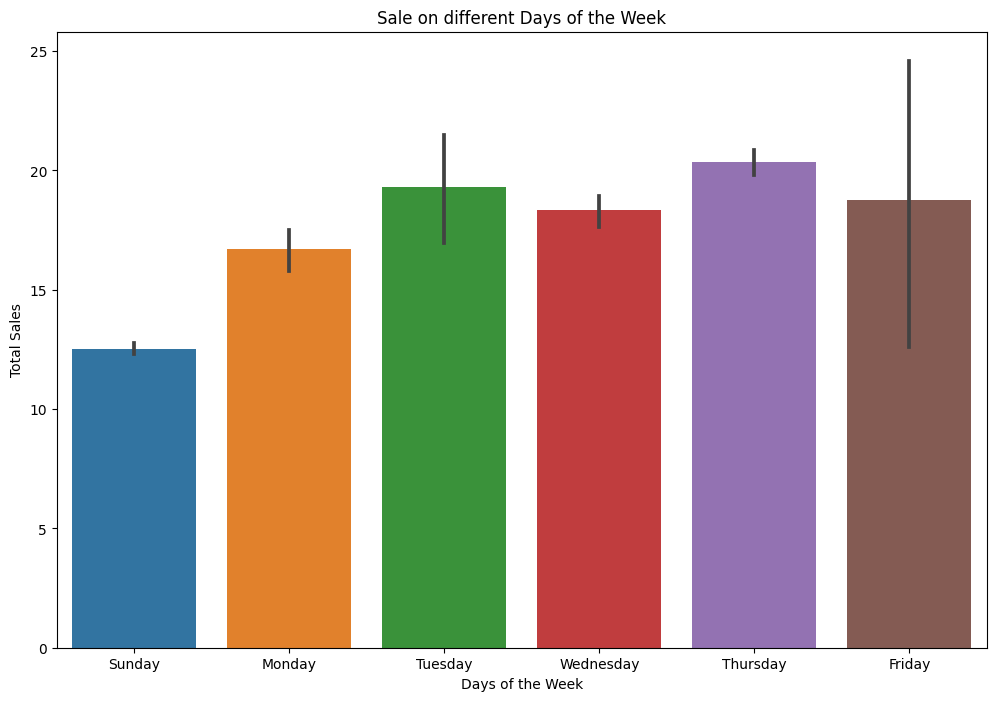

In [39]:
# Barplot will plot the sum of the total price across all days, this allows us to
# see if there are certain days where sales are higher. 

plt.figure(figsize = (12, 8))
sns.barplot(x = "DayName", y = "TotalPrice", data = retail_dataset)
plt.title("Sale on different Days of the Week")

plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

# no data for saturday, Tues & Thurs seems to be highest sale days. 

In [40]:
# created a privot table that visualizes the average sales of products for everyday of the month
# pivot index will consist of the month, DayName, TotalPrice, mean

pivot_retail_dataset = retail_dataset.pivot_table(index = "Month",
                                                   columns = "DayName",
                                                   values = "TotalPrice",
                                                   aggfunc = 'mean')
pivot_retail_dataset

DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,11.762723,13.467239,22.550955,10.783391,15.268229,21.191434
2,10.881136,17.593479,20.645124,17.644712,17.921416,19.731333
3,12.515954,15.796542,20.068797,19.500339,21.217719,18.401292
4,10.968655,12.859517,17.524975,21.084665,16.935445,18.164409
5,13.522372,16.347291,19.758022,21.476077,23.236644,20.943266
6,14.750474,14.819851,22.200670,19.406001,21.045809,17.506308
7,17.529891,15.416745,20.075582,13.530932,22.117437,14.875545
8,11.267307,17.703343,14.370908,20.189433,31.152445,17.143711
9,14.976976,22.414052,31.686284,15.147822,21.386629,18.057490


Text(120.72222222222221, 0.5, 'Months represented')

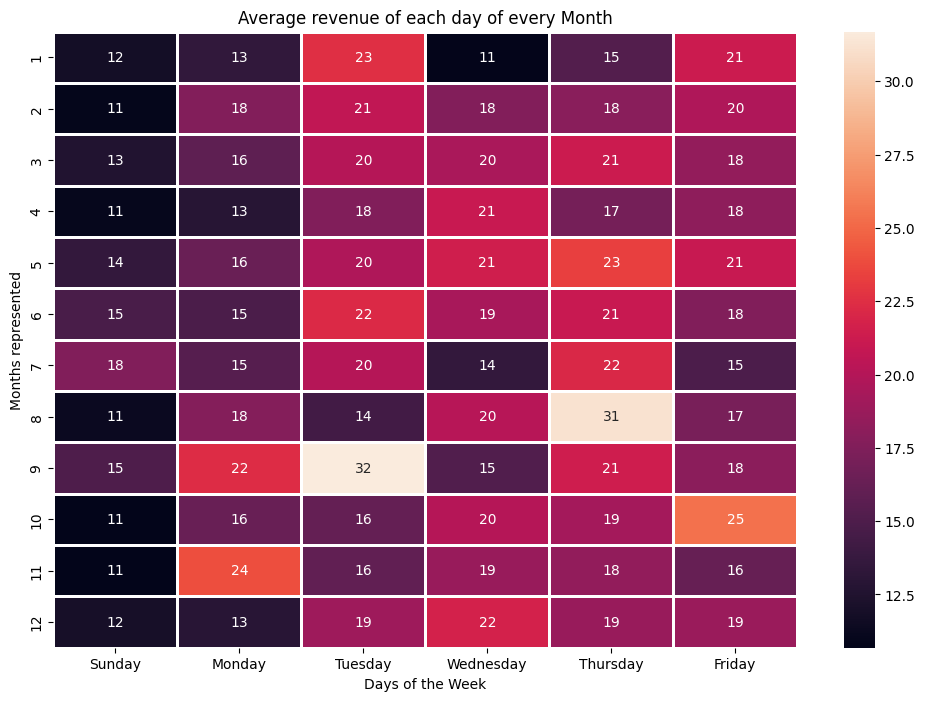

In [41]:
# now that we have the average sale data, I displayed these averges in a heatmap visualization

plt.figure(figsize = [12, 8])
sns.heatmap(pivot_retail_dataset, linewidths = 1, annot = True)
plt.title("Average revenue of each day of every Month")

plt.xlabel("Days of the Week")
plt.ylabel("Months represented")


Text(0, 0.5, 'Frequency')

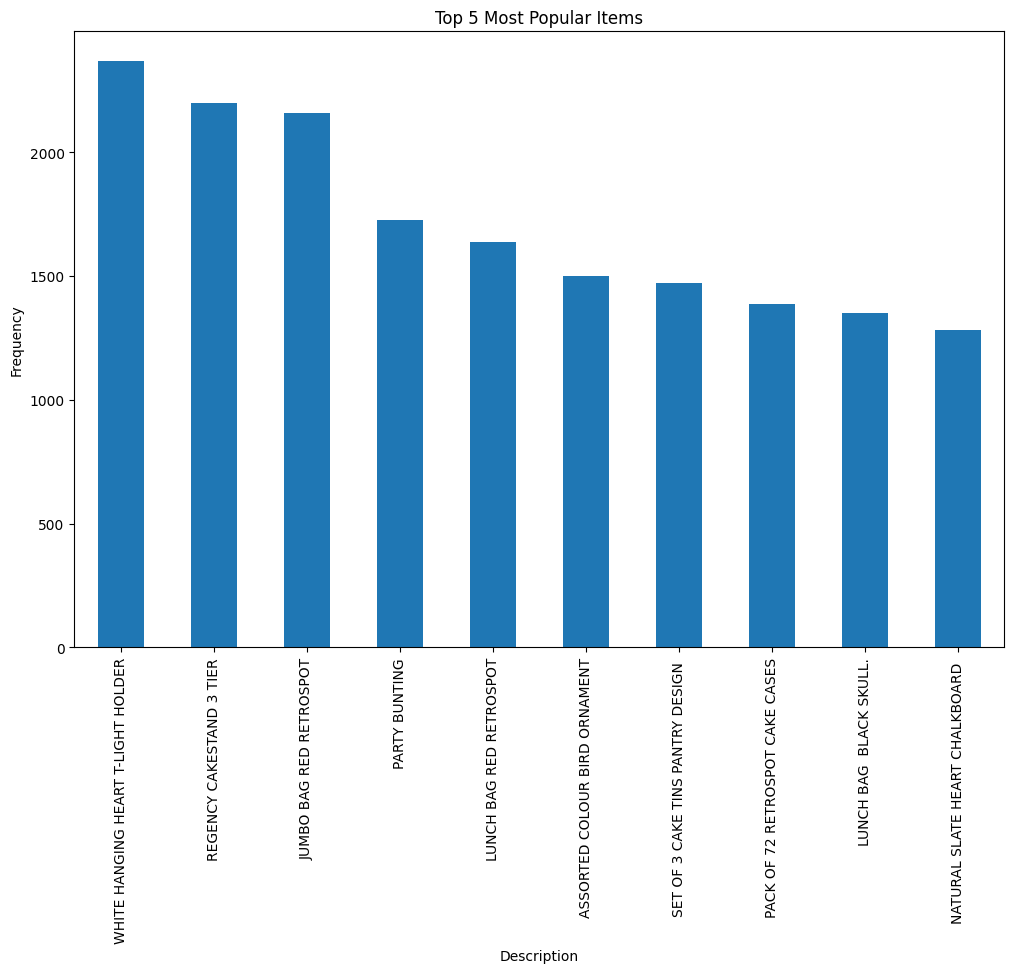

In [42]:
# based on the quantity of a paticular item sold, I plotted the 10 most popular items

fig, ax = plt.subplots(figsize = (12,8))
retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10).plot.bar()
plt.title("Top 5 Most Popular Items")

plt.xlabel("Description")
plt.ylabel("Frequency")


Text(0.5, 1.0, 'Top 5 Most Popular Items')

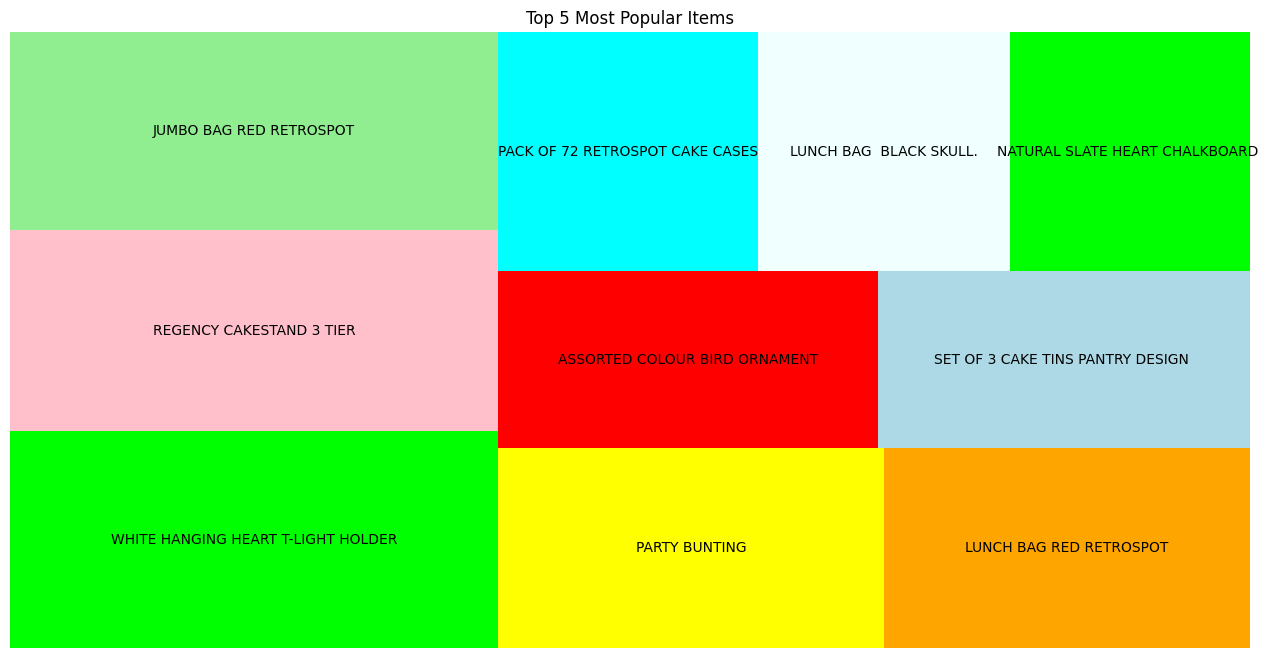

In [43]:
# implemented a tree map as they are slightly more better is setting up visualization

plt.figure(figsize = (16,8))

x = retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10)
color = ["lime", "pink", "lightgreen", "yellow", "orange", "red", "lightblue", "cyan", "azure"]
sq.plot(sizes = x, label = x.index, color = color).axis('off')
plt.title("Top 5 Most Popular Items")

In [44]:
# Now that I've sorted out my data and will perform market basket analysis
# I'm getting rid of the colums I dont need

retail_dataset = retail_dataset.drop(["Quantity",
                                      "InvoiceDate", "UnitPrice",\
                                      "Country", "TotalPrice",\
                                      "Year", "Month", "Hour", \
                                      "DayOfWeek", "DayName"], axis = 1)

retail_dataset.head()

#the only columns I need are InvoiceNo and Descriptions.

,InvoiceNo,StockCode,Description,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0
1,536365,71053,WHITE METAL LANTERN,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0


In [47]:
# now I'd like to know which products are sold together (which items are aprart of the same invoice)

# Convert "Description" column to string type
retail_dataset["Description"] = retail_dataset["Description"].astype(str)

# Group by "InvoiceNo" and concatenate the items in each transaction for string columns
items_per_transaction = retail_dataset.groupby("InvoiceNo")["Description"].agg(",".join).reset_index()

# Display the result
items_per_transaction.head()


,InvoiceNo,Description
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
1,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
2,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
3,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
4,536369,BATH BUILDING BLOCK WORD
